coefficient of determination :  0.24456688961685802
slope :  [74.14307112]
intercept :  -23.01449070317839


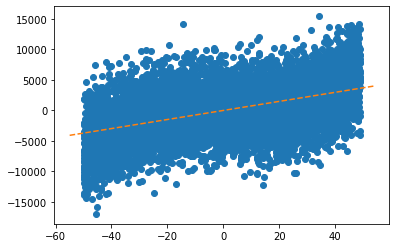

In [1]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--')

inline = open('./data/train.pkl','rb')
data = pickle.load(inline,encoding='bytes')
temp_x = []
temp_y = []
for i in data:
    temp_x.append(i[0])
    temp_y.append(i[1])

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

reg = LinearRegression().fit(x, y)
print('coefficient of determination : ' ,reg.score(x, y))
print("slope : " ,reg.coef_)
print("intercept : " ,reg.intercept_)

plt.plot(temp_x,temp_y,'o')
abline(reg.coef_,reg.intercept_)
plt.show()

In [18]:
import random
inline2 = open('../Linear-Regression/data/test.pkl','rb')
data2 = pickle.load(inline2,encoding='bytes')
var = list(range(len(data)))
random.shuffle(var)
packets = len(data)/10
temp_test_x = []
temp_test_y = []
resampled_x = []
resampled_y = []
temp_kx = []
temp_ky = []
z = 0

for i in var:
    if((z+1)%packets == 0):
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
        resampled_x.append(temp_kx)
        resampled_y.append(temp_ky)
        temp_ky = []
        temp_kx = []
    else:
        temp_kx.append(data[i][0])
        temp_ky.append(data[i][1])
    z+=1

for i in data2 : 
    temp_test_x.append(i[0])
    temp_test_y.append(i[1])
    
print(var)
print("Resampled X : \n" + str(resampled_x))
print("Resampled Y : \n" + str(resampled_y))

[1184, 3241, 3829, 3677, 3945, 4882, 4139, 2500, 7145, 4440, 2140, 4192, 3690, 434, 6374, 4820, 6151, 559, 1256, 7972, 7680, 583, 6713, 7458, 4579, 1528, 3024, 6055, 4069, 7728, 5299, 441, 6424, 2012, 4003, 1925, 5926, 808, 3301, 6938, 646, 655, 7114, 5426, 773, 7266, 3617, 813, 5990, 3788, 1761, 5145, 5666, 2546, 1592, 1974, 5338, 505, 270, 2769, 3566, 4589, 6105, 2627, 5756, 2824, 2456, 3795, 6568, 5762, 6121, 7267, 2343, 3558, 446, 5509, 3611, 1234, 4449, 303, 6343, 7436, 928, 6644, 3159, 516, 5376, 5017, 5942, 3380, 839, 3110, 6085, 1749, 6104, 4864, 2099, 1576, 7712, 3646, 1614, 2060, 691, 7795, 5384, 2906, 2221, 408, 1509, 5085, 2608, 3598, 4227, 3278, 3353, 6409, 4316, 4811, 1311, 3267, 7591, 5674, 4833, 1329, 319, 1339, 5063, 3199, 96, 1326, 4452, 3901, 335, 6479, 988, 4131, 4768, 3516, 1945, 620, 3609, 5628, 1531, 4847, 4936, 7820, 2855, 7124, 1506, 20, 7692, 5586, 1729, 3644, 709, 4725, 1674, 3088, 7889, 180, 7403, 5112, 5156, 3367, 3489, 1940, 1522, 93, 3127, 1919, 6229, 305

In [47]:
from sklearn.preprocessing import PolynomialFeatures
import math

x = np.array(temp_x).reshape(-1,1)
y = np.array(temp_y)

temp_test_x2 = np.array(temp_test_x).reshape(-1,1)

mean_bias = []
mean_variance = []
total_polynomials = 10
data_set = []
total_error = []
# irreduceble_error = []

for i in range(1,total_polynomials+1):        # Polynomial loop
    poly_bias = []
    val_mean = 0
    val_variance = 0
    temp_total_error = 0
    bias = [0 for k in range(1,total_polynomials+1)]
    for j in range(0,10):       # test case loop
        abc = np.array(resampled_x[j]).reshape(-1,1)
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(abc)
        poly_reg.fit(X_poly,y)
        # print("i : " + str(i) + " | j : "+ str(j))
        lin_reg = LinearRegression().fit(X_poly,resampled_y[j])
        # plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o')
        predicted_value = lin_reg.predict(poly_reg.fit_transform(temp_test_x2))
        poly_bias.append(predicted_value)
        # print('coefficient of determination : ' ,lin_reg.score(X_poly,resampled_y[j]))
        for k in range(0,len(predicted_value)):
            val_mean += predicted_value[k]
    val_mean = val_mean/10
    for k in  range(0,len(temp_test_y)):
        val_mean -= temp_test_y[k]
    val_mean = val_mean/len(temp_test_y)
    mean_bias.append(val_mean)
    # variance finding down
    data_set.append(poly_bias)
    for j in range(0,len(poly_bias[0])):
        temp = 0
        for k in range(0,10):
            temp += poly_bias[k][j]
        temp = temp/10
        for k in range(0,10):
            val_variance +=  math.pow((poly_bias[k][j] - temp),2)
    val_variance = val_variance/len(poly_bias[0])
    mean_variance.append(val_variance)
    # total error below
    for j in range(0,len(temp_test_y)):
        for k in range(0,10):
            temp_total_error += math.pow(temp_test_y[j] - poly_bias[k][j],2)
    temp_total_error = temp_total_error/10
    total_error.append(temp_total_error)
        
squared_mean_bias = [ i*i for i in mean_bias]
irreduceble_error = [(total_error[i] - squared_mean_bias[i] - mean_variance[i]) for i in range(0,total_polynomials)]
print("\x1b[6;30;46m"+"Mean Bias : " + "\x1b[0m" + "\n",mean_bias)
print("\x1b[6;30;46m"+"Squared Mean Bias : " + "\x1b[0m" + "\n",squared_mean_bias)
print("\x1b[6;30;46m"+"Mean Variance : " + "\x1b[0m" + "\n",mean_variance)
print("\x1b[6;30;46m"+"Total Error : " + "\x1b[0m" + "\n",total_error)
print("\x1b[6;30;46m"+"Irreduceble Error : " + "\x1b[0m" + "\n",irreduceble_error)

Mean Bias : 
 [231.86951996477484, 226.7425315764136, -12.005097495424101, -6.933003766449073, -6.336231662292502, -7.576703231095925, -8.422859447052687, -10.964056493892745, -11.746871391412546, -8.879815178449334]
Squared Mean Bias : 
 [53763.47428869512, 51412.17562568092, 144.12236587463804, 48.066541225597035, 40.147831678238006, 57.40643185209942, 70.9445612648047, 120.21053480127166, 137.98898748638652, 78.85111760341918]
Mean Variance : 
 [488665.2635514713, 691456.261231934, 653727.411099895, 854580.6157980546, 1115678.3960989772, 1240835.9992485554, 1415215.1024927471, 1531682.8715936155, 1662115.723846584, 1792180.4555500052]
Total Error : 
 [84260334.19999361, 82281421.69932613, 5827140.247716652, 7407905.954725434, 9445900.44637773, 10475804.061061267, 11900886.422594193, 12830959.433366999, 13912565.4835976, 15065765.19531073]
Irreduceble Error : 
 [83717905.46215343, 81538553.26246852, 5173268.714250883, 6553277.272386154, 8330181.902447075, 9234910.65538086, 10485600.3

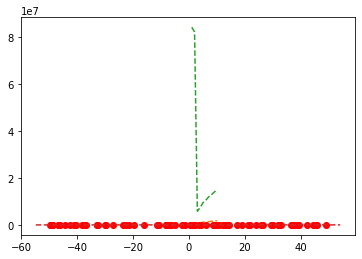

In [53]:
plt.plot([i for i in range(1,total_polynomials + 1)],squared_mean_bias,'--',label='Bias^2')
plt.plot([i for i in range(1,total_polynomials + 1)],mean_variance,'--',label='variance')
plt.plot([i for i in range(1,total_polynomials + 1)],total_error,'--',label='Total Error')

# plt.plot(temp_test_x2, lin_reg.predict(poly_reg.fit_transform(temp_test_x2)),'o', color='red')
# abline(reg.coef_,reg.intercept_)
plt.show()

In [50]:
print("WTF Happening Here")

WTF Happening Here
